In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [42]:
df=pd.read_csv('health_lifestyle.csv')
df

,Smokes,Drinks_Alcohol,Eats_Fast_Food,Follows_Diet,Exercises,Sleep_Quality,Stress_Level,Water_Intake,Has_Health_Checkups,Takes_Medicine,Health_Status
0,Yes,Yes,Weekly,Non-Vegetarian,Running,High,High,Insufficient,No,Yes,Healthy
1,No,Yes,Rarely,Vegan,Yoga,High,High,Sufficient,No,Yes,Healthy
2,Yes,No,Daily,Mixed,Yoga,Low,Low,Sufficient,No,Yes,Healthy
3,No,Yes,Rarely,Non-Vegetarian,NaN,Low,High,Sufficient,Yes,No,Healthy
4,No,No,Weekly,Mixed,NaN,High,Medium,Insufficient,No,No,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...
995,Yes,No,Daily,Vegan,Yoga,Medium,High,Insufficient,No,No,Unhealthy
996,Yes,No,Rarely,Non-Vegetarian,Gym,Medium,Medium,Insufficient,No,No,Unhealthy
997,No,No,Never,Mixed,Gym,High,High,Insufficient,Yes,Yes,Unhealthy
998,Yes,Yes,Rarely,Mixed,Running,Low,Medium,Insufficient,No,No,Healthy


In [43]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=LabelEncoder().fit_transform(df[i])
df

,Smokes,Drinks_Alcohol,Eats_Fast_Food,Follows_Diet,Exercises,Sleep_Quality,Stress_Level,Water_Intake,Has_Health_Checkups,Takes_Medicine,Health_Status
0,1,1,3,1,1,0,0,0,0,1,0
1,0,1,2,2,2,0,0,1,0,1,0
2,1,0,0,0,2,1,1,1,0,1,0
3,0,1,2,1,3,1,0,1,1,0,0
4,0,0,3,0,3,0,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,2,2,2,0,0,0,0,1
996,1,0,2,1,0,2,2,0,0,0,1
997,0,0,1,0,0,0,0,0,1,1,1
998,1,1,2,0,1,1,2,0,0,0,0


In [44]:
x=df.drop("Health_Status",axis=1)
y=df["Health_Status"]

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
model=BernoulliNB()
model.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [47]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1])

In [48]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.505

In [49]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[53, 38],
       [61, 48]])

In [50]:
cross=cross_validate(model,x,y,cv=5,return_train_score=True)
cross

{'fit_time': array([0.        , 0.00891662, 0.00221539, 0.        , 0.        ]),
 'score_time': array([0.        , 0.00164843, 0.        , 0.        , 0.00959539]),
 'test_score': array([0.555, 0.505, 0.545, 0.525, 0.545]),
 'train_score': array([0.5625, 0.585 , 0.575 , 0.575 , 0.5775])}

In [51]:
cla=classification_report(y_test,y_pred)
cla

'              precision    recall  f1-score   support\n\n           0       0.46      0.58      0.52        91\n           1       0.56      0.44      0.49       109\n\n    accuracy                           0.51       200\n   macro avg       0.51      0.51      0.50       200\nweighted avg       0.52      0.51      0.50       200\n'

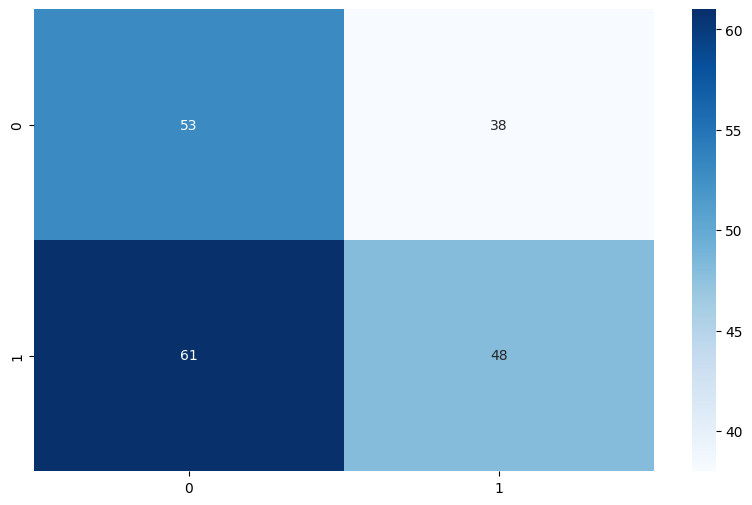

In [52]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d',cmap="Blues")
plt.show()